#  <font color = #00BFFF> Part 1: Import Libraries and Dataset </font> 

## <font color = #87CEFA> 1.1. Import Libraries </font>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <font color = #87CEFA> 1.2. Import Dataset </font>

In [112]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#  <font color = #00BFFF> Part 2: Data Understanding </font> 

### The Iris flower dataset consists of three species: Setosa, Versicolor,and Virginica. These species can be distinguished based on their measurements.

![image.png](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)

### The dataset consists of:

* ### 150 samples
* ### 3 labels: species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor)
* ### 4 features: Sepal length, Sepal width, Petal length, Petal Width in cm

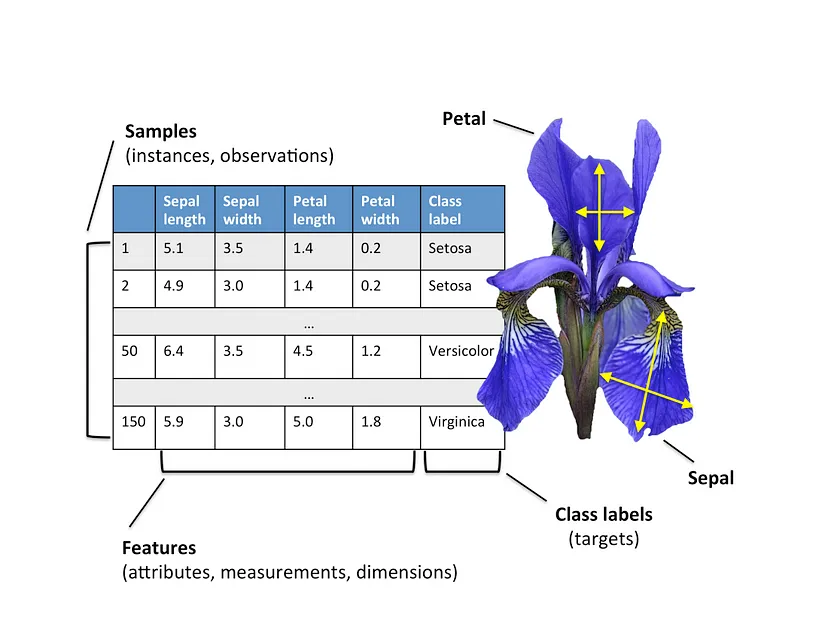

## <font color = #87CEFA> 2.1. Overview of the Data </font>

In [113]:
# Check the rows and columns
df.shape

(150, 6)

In [114]:
# Check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
# Check for Duplicated values
duplicated_values = df.duplicated().sum()
print(f"Number of duplicates: {duplicated_values}")

Number of duplicates: 0


In [116]:
# Check for Missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [117]:
# Data Description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h2>  <font color = #87CEFA> 2.2. Outliers detection </font> </h2>

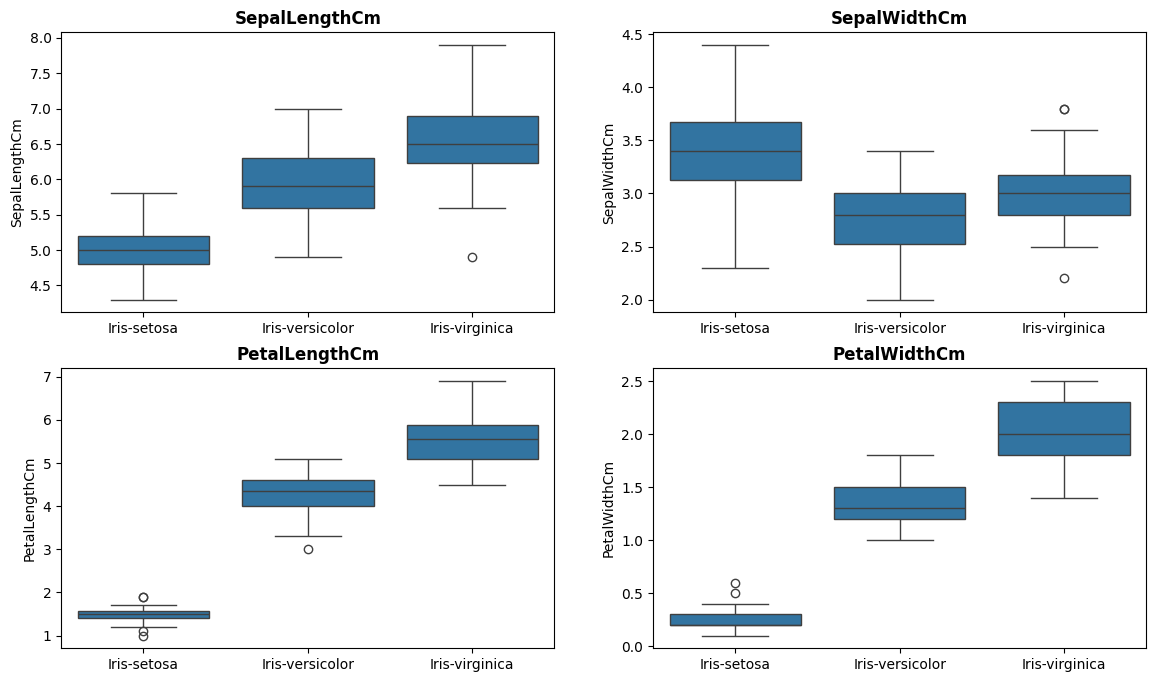

In [118]:
# boxplots
columns = df.drop(columns=['Id', 'Species']).columns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=df['Species'], y=df[col], ax=axes[i])
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('')

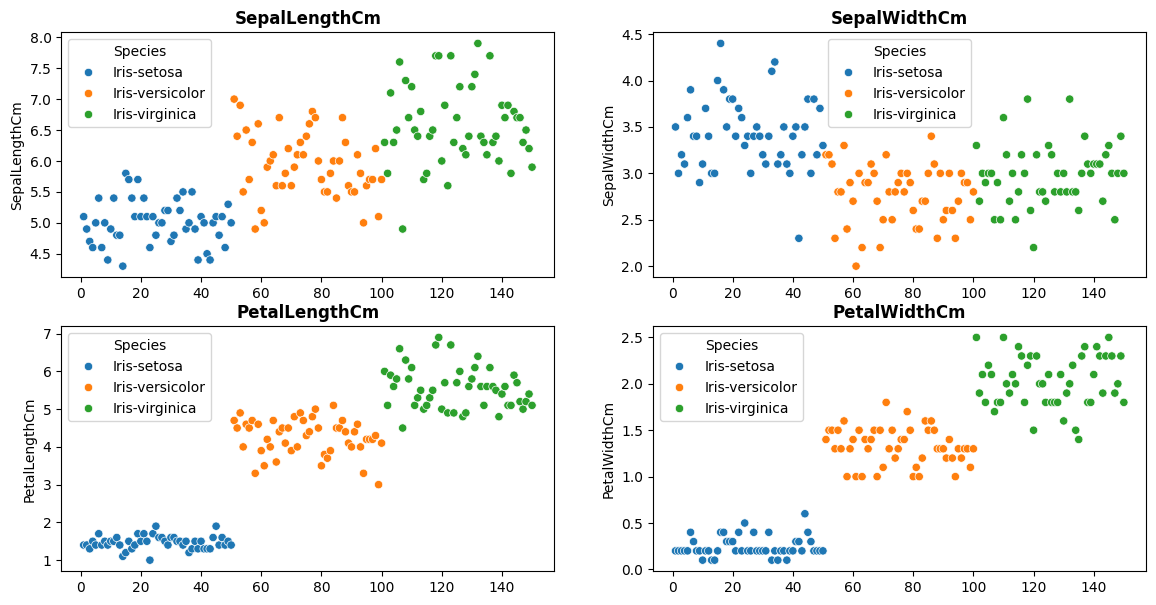

In [119]:
# scatterplots
columns = df.drop(columns=['Id', 'Species']).columns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.scatterplot(x=df['Id'], y=df[col], hue=df['Species'], ax=axes[i])
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('')

> ### Let's find outliers using 3-Sigma Method.

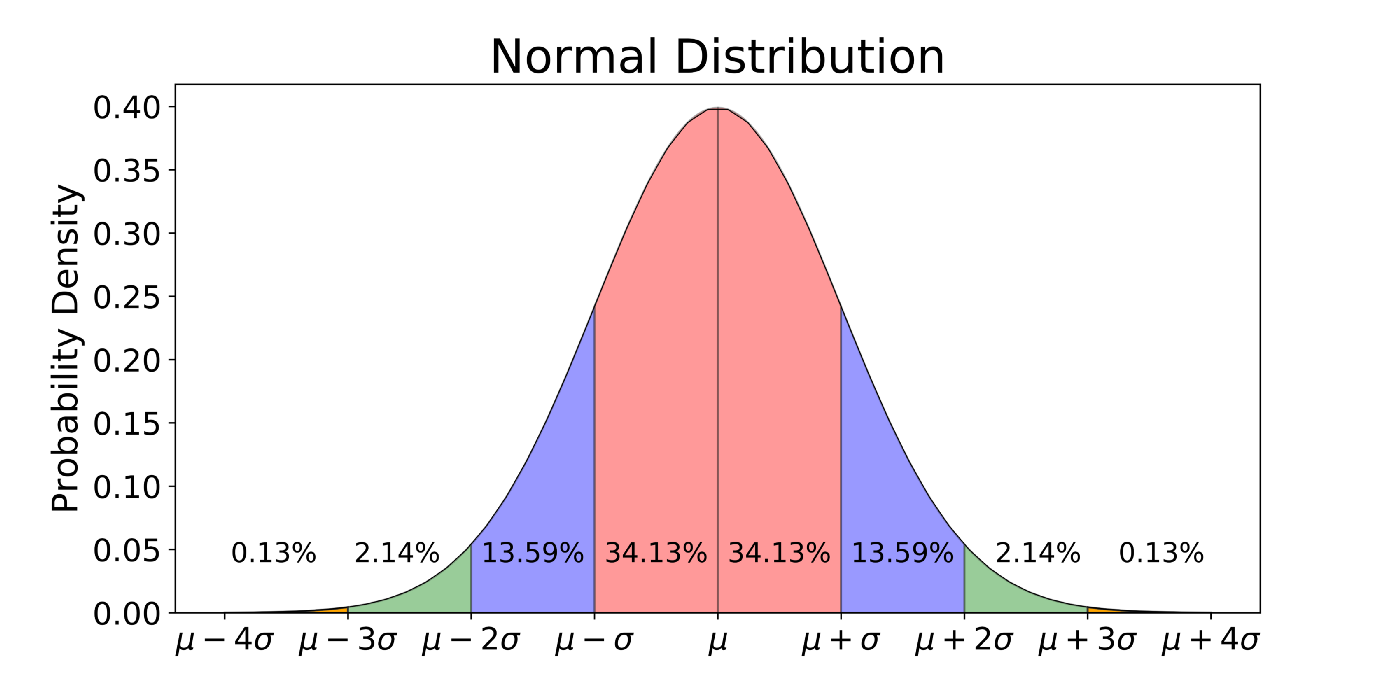

In [120]:
for column in df.columns[1:-1]:
    for species in df["Species"].unique():
        # select the required data
        species_data=df[df["Species"]== species]
        # select the required column
        selected_column=species_data[column]

        # compute mean and std
        mean = selected_column.mean()
        std = selected_column.std()
        # compute lower and upper bounds
        upper_lmt = mean + (3 * std) 
        lower_lmt= mean - (3 * std)

        # select outliers
        outliers=selected_column[((selected_column > upper_lmt) | (selected_column< lower_lmt))].index # pick outliers' indeces
        print(column, species, outliers)
        df.drop(index=outliers, inplace=True) # drop outliers

SepalLengthCm Iris-setosa Index([], dtype='int64')
SepalLengthCm Iris-versicolor Index([], dtype='int64')
SepalLengthCm Iris-virginica Index([], dtype='int64')
SepalWidthCm Iris-setosa Index([], dtype='int64')
SepalWidthCm Iris-versicolor Index([], dtype='int64')
SepalWidthCm Iris-virginica Index([], dtype='int64')
PetalLengthCm Iris-setosa Index([], dtype='int64')
PetalLengthCm Iris-versicolor Index([], dtype='int64')
PetalLengthCm Iris-virginica Index([], dtype='int64')
PetalWidthCm Iris-setosa Index([43], dtype='int64')
PetalWidthCm Iris-versicolor Index([], dtype='int64')
PetalWidthCm Iris-virginica Index([], dtype='int64')


> ### As we can see, this method found 1 outlier, we've already removed it. So, let's dive into EDA.

In [121]:
df.shape

(149, 6)